In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Liberation Sans'

In [4]:
import btrack
import glob


In [7]:
# Load segmentation if necessary
seg_fn = glob.glob(f'/mnt/SYNO/macrohet_syno/data/ND0003/labels/*/(3, 5).h5')[0]

with btrack.io.HDF5FileHandler(seg_fn, 'r', obj_type='obj_type_1') as reader:
    segmentation = reader.segmentation
    tracks = reader.tracks

[INFO][2024/09/13 10:17:23 AM] Opening HDF file: /mnt/SYNO/macrohet_syno/data/ND0003/labels/cpv3/(3, 5).h5...
[INFO][2024/09/13 10:17:43 AM] Loading segmentation (154, 6048, 6048)
[INFO][2024/09/13 10:17:43 AM] Loading tracks/obj_type_1
[INFO][2024/09/13 10:17:43 AM] Loading LBEP/obj_type_1
[INFO][2024/09/13 10:17:43 AM] Loading objects/obj_type_1 (46222, 5) (46222 filtered: None)
[INFO][2024/09/13 10:17:44 AM] Closing HDF file: /mnt/SYNO/macrohet_syno/data/ND0003/labels/cpv3/(3, 5).h5


In [6]:
import napari

In [10]:
tracks = [t for t in tracks if t.in_frame(0)]

In [11]:
segmentation = segmentation[0]

In [13]:
tracks[0]

,ID,t,x,y,z,parent,root,state,generation,dummy,Infected,mean_intensity,area,orientation,minor_axis_length,major_axis_length,Mtb area px
0,226,0,13.840181,67.211830,0.000000,226,226,5,0,False,0.0,"(3,) array",35334.0,-0.007549,164.637192,282.847137,0.0
1,226,1,8.474172,77.999992,0.000000,226,226,5,0,False,0.0,"(3,) array",18937.0,-0.059589,109.240921,238.944870,0.0
2,226,2,4.853632,86.495079,0.403968,226,226,5,0,True,NaN,"(3,) array",NaN,NaN,NaN,NaN,NaN
3,226,3,1.233094,94.990173,0.807937,226,226,5,0,True,NaN,"(3,) array",NaN,NaN,NaN,NaN,NaN
4,226,4,6.107479,82.829491,0.000000,226,226,5,0,False,0.0,"(3,) array",10609.0,0.011228,74.864838,187.833023,0.0


In [14]:
segmentation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

# Baptises' data

In [28]:
fn = '/run/user/30046150/gvfs/smb-share:server=ds3617xs.local,share=opera2/Histology/Baptiste/PZA in tissue (Tony\'s experiments)/Exp1 2022-01-06/AF01 (done) -RD1-UT/AF01_Scan2-Top-ROI-measurement-coord-Mtb.csv'


In [31]:
import os
import pandas as pd

In [33]:
df = pd.read_csv(os.path.basename(fn))

In [41]:
df.sort_values

In [42]:
df

,,Area,Mean,X,Y,XM,YM,MinThr,MaxThr,Mtb Area,PseudoX,PseudoY
0,66103,14.142,1.819,17198,5082,17198.459,5082.300,0,255,0.125,3492,2844
1,75034,60.572,1.918,17243,5083,17243.018,5083.533,0,255,0.000,3983,3109
2,60530,75.652,1.911,17181,5084,17181.809,5084.577,0,255,0.000,3187,2676
3,5445,43.239,1.946,17192,5084,17192.168,5084.134,0,255,0.125,496,503
4,111133,33.790,1.880,17251,5084,17251.273,5084.884,0,255,0.250,5702,4151
...,...,...,...,...,...,...,...,...,...,...,...,...
163081,36159,125.149,73.138,12770,11081,12769.415,11079.707,0,255,0.000,1955,1924
163082,132761,239.785,29.522,12761,11086,12760.465,11080.725,0,255,0.000,7006,4741
163083,74810,163.507,0.943,12753,11094,12752.893,11093.996,0,255,0.000,3972,3102
163084,156133,121.707,0.737,12748,11102,12748.336,11102.530,0,255,0.000,8588,5435


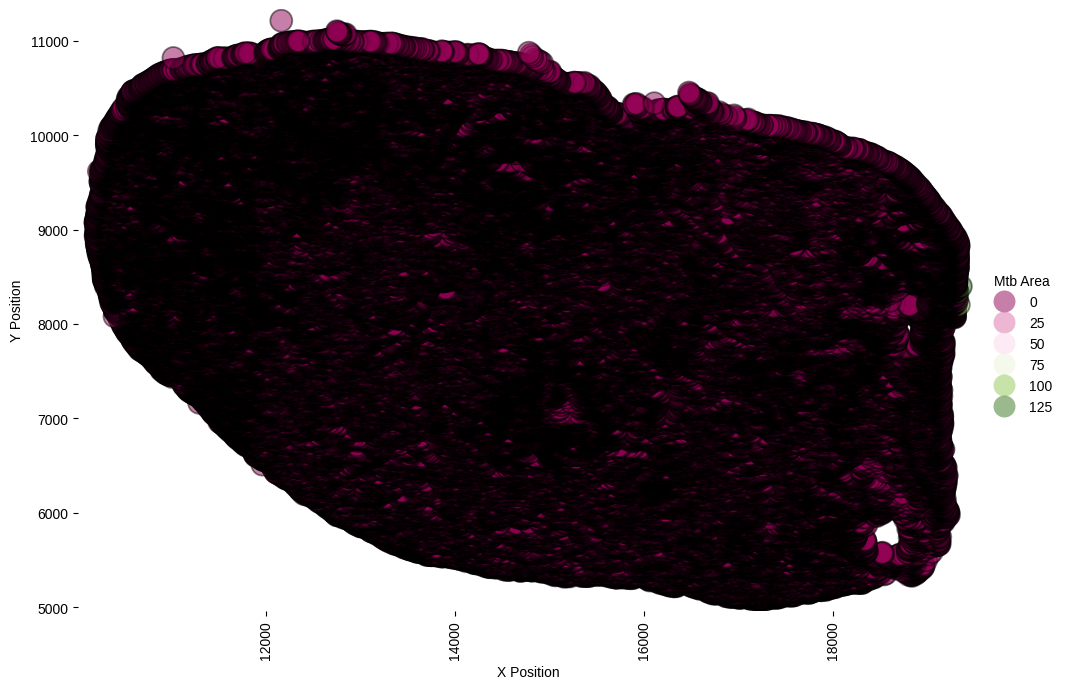

In [72]:
# Create a scatter plot using relplot
g = sns.relplot(
    data=df,
    x="X", y="Y", hue="Mtb Area", size="Mtb Area", alpha = 0.5,
    palette="PiYG", hue_norm=(df['Mtb Area'].min(), df['Mtb Area'].max()), 
    edgecolor=".0", height=10, sizes=(250, 250), size_norm=(df['Mtb Area'].min(), df['Mtb Area'].max()),
)

# Finalize the figure
g.set(xlabel="X Position", ylabel="Y Position", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

# Rotate X labels for better visibility if needed
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

plt.show()


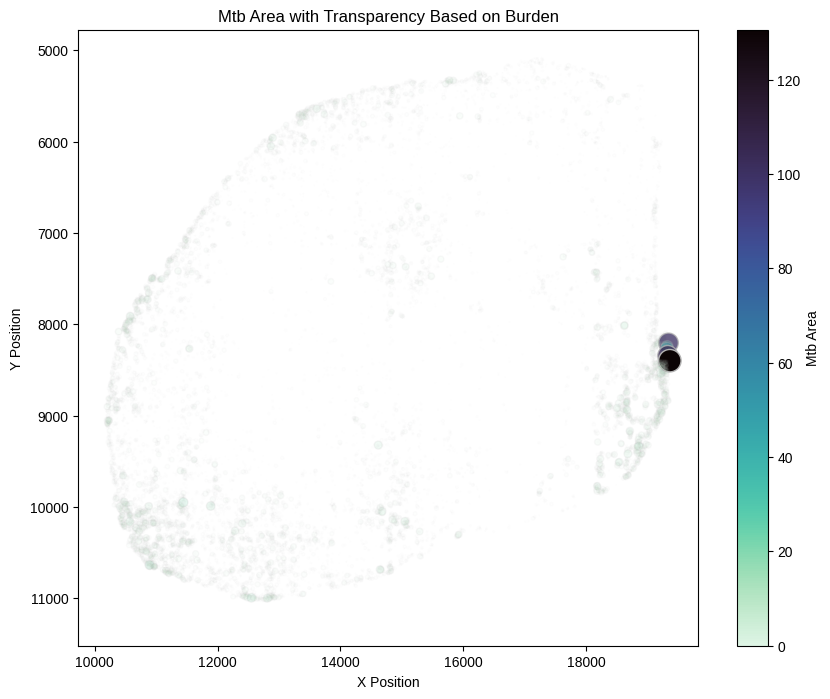

In [71]:
# Filtered DataFrame based on 'Mtb Area'
filtered_df = df # df[df['Mtb Area'] < 100]

# Normalize Mtb Area to use for transparency (alpha)
filtered_df['alpha'] = (filtered_df['Mtb Area'] - filtered_df['Mtb Area'].min()) / (filtered_df['Mtb Area'].max() - filtered_df['Mtb Area'].min())

# Create the scatter plot using matplotlib
plt.figure(figsize=(10, 8))

# Plot the scatter points with varying transparency (alpha)
plt.scatter(
    filtered_df['X'], filtered_df['Y'], 
    s=filtered_df['Mtb Area'] * 2,  # Scale the size based on Mtb Area
    c=filtered_df['Mtb Area'],       # Color based on Mtb Area
    cmap='mako_r',                   # Color palette
    alpha=filtered_df['alpha'],      # Transparency based on Mtb Area
    edgecolor='0.7'
)

# Customize the plot
plt.colorbar(label='Mtb Area')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title('Mtb Area with Transparency Based on Burden')
plt.gca().invert_yaxis()  # Invert y-axis for typical image-like behavior
plt.show()


In [99]:
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import numpy as np

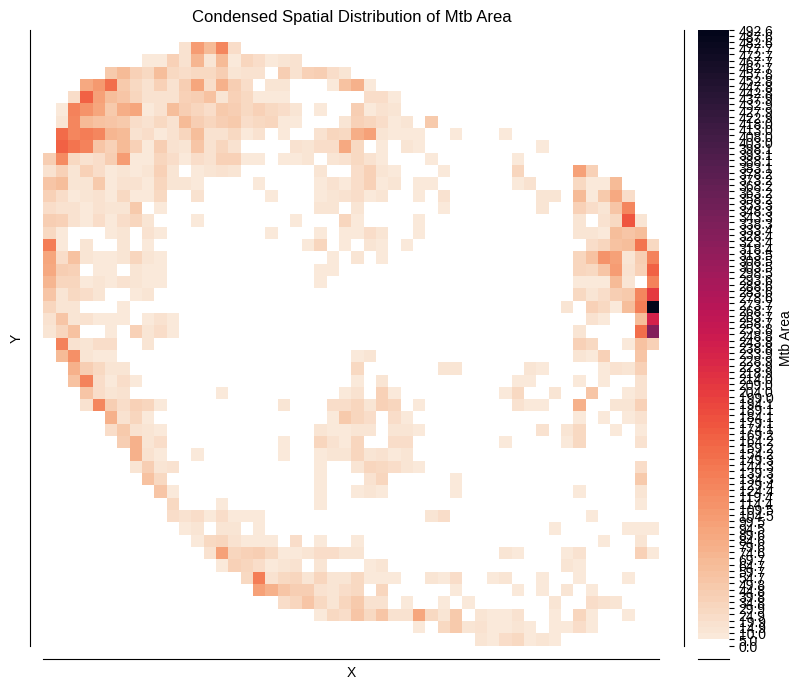

In [102]:
# Create the original 'rocket' palette from seaborn
rocket_palette = sns.color_palette("rocket_r", as_cmap=True)

# Define a custom colormap with white for the lowest value (0) and rocket for the rest
colors = [(1, 1, 1)] + list(rocket_palette(np.linspace(0, 1, 256)))  # Add white to the start
custom_cmap = LinearSegmentedColormap.from_list('white_to_rocket', colors)

# Step 1: Define the number of bins or grid size for X and Y
grid_size = 50  # You can adjust this to get different resolutions

# Bin the X and Y values into discrete intervals
df['X_bin'] = pd.cut(df['X'], bins=grid_size, labels=False)
df['Y_bin'] = pd.cut(df['Y'], bins=grid_size, labels=False)

# Step 2: Aggregate the Mtb Area for each grid cell (sum or any aggregation function)
grid_data = df.groupby(['X_bin', 'Y_bin'])['Mtb Area'].sum().unstack().T

# Define discrete levels based on the range of the data
levels = np.linspace(grid_data.min().min(), grid_data.max().max(), 100)  # Adjust the number of levels here

# Normalize the colormap based on the levels
norm = BoundaryNorm(boundaries=levels, ncolors=custom_cmap.N)

# Step 3: Plot the heatmap to visualize the condensed grid representation
plt.figure(figsize=(10, 8))
sns.heatmap(grid_data, cmap=custom_cmap, norm=norm, cbar_kws={'label': 'Mtb Area', 'ticks': levels}, square=True)

# Customize the plot
plt.title('Condensed Spatial Distribution of Mtb Area')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().invert_yaxis()  # Match image-like behavior
plt.yticks([])
plt.xticks([])
sns.despine(offset=10)

# Show the plot
plt.show()

# More data


In [103]:
df = pd.read_csv('AF07_Scan1-top-ROI-measurement-coord-Mtb.csv')

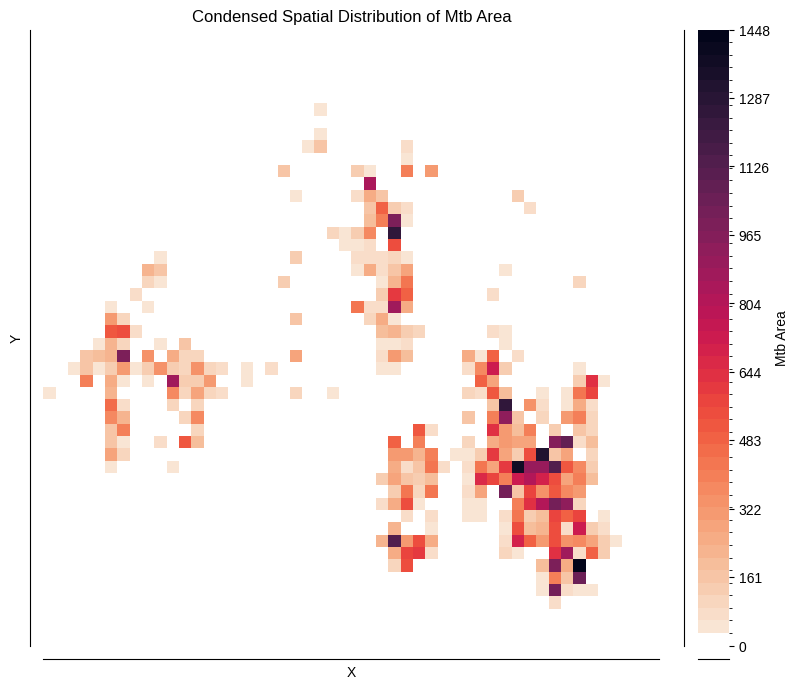

In [106]:
# Create the original 'rocket' palette from seaborn
rocket_palette = sns.color_palette("rocket_r", as_cmap=True)

# Define a custom colormap with white for the lowest value (0) and rocket for the rest
colors = [(1, 1, 1)] + list(rocket_palette(np.linspace(0, 1, 256)))  # Add white to the start
custom_cmap = LinearSegmentedColormap.from_list('white_to_rocket', colors)

# Step 1: Define the number of bins or grid size for X and Y
grid_size = 50  # You can adjust this to get different resolutions

# Bin the X and Y values into discrete intervals
df['X_bin'] = pd.cut(df['X'], bins=grid_size, labels=False)
df['Y_bin'] = pd.cut(df['Y'], bins=grid_size, labels=False)

# Step 2: Aggregate the Mtb Area for each grid cell (sum or any aggregation function)
grid_data = df.groupby(['X_bin', 'Y_bin'])['Mtb Area'].sum().unstack().T

# Define dis

# Define discrete levels based on the range of the data
levels = np.linspace(grid_data.min().min(), grid_data.max().max(), 50)  # Keep 100 levels

# Normalize the colormap based on the levels
norm = BoundaryNorm(boundaries=levels, ncolors=custom_cmap.N)

# Define ticks for the colorbar with only 10 labels
cbar_ticks = np.linspace(grid_data.min().min(), grid_data.max().max(), 10)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    grid_data,
    cmap=custom_cmap,
    norm=norm,
    cbar_kws={'label': 'Mtb Area', 'ticks': cbar_ticks},
    square=True
)

# Customize the plot
plt.title('Condensed Spatial Distribution of Mtb Area')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().invert_yaxis()  # Match image-like behavior
plt.yticks([])
plt.xticks([])
sns.despine(offset=10)

# Show the plot
plt.show()
